<h2>Charger et lire le dataset</h2>

In [27]:
import pandas as pd

# Lire le fichier CSV
df = pd.read_csv("C:/Users/SARA/Documents/cours_ynov_B3/Aprojet_pro/datast/films_fusionnes_clean.csv", encoding='utf-8', sep=",")

# Afficher les 5 premières lignes
print(df.head(2))


        ID                Titre                     Genre     Pays_origine  \
0  1000837  Je suis toujours là            Drame Histoire   Brazil, France   
1  1001274    La Nuit se traîne  Thriller Action Policier  Belgium, France   

      Budget    Recettes  Noffmbre_votes  Unnamed: 7       Realisateurs  \
0  1480000.0  36109482.0             709        8.00      Walter Salles   
1  4870000.0         0.0             104        6.83  Michiel Blanchart   

                                  Acteurs_principaux  Date_sortie  
0  Fernanda Torres, Selton Mello, Valentina Hersz...         2024  
1  Jonathan Feltre, Natacha Krief, Jonas Bloquet,...         2024  


In [28]:
# Supposons que ton DataFrame s'appelle df

# Afficher la liste des colonnes
print("Colonnes du DataFrame :")
print(df.columns)

# Compter les valeurs manquantes par colonne
print("\nNombre de valeurs manquantes (NaN) par colonne :")
print(df.isna().sum())

Colonnes du DataFrame :
Index(['ID', 'Titre', 'Genre', 'Pays_origine', 'Budget', 'Recettes',
       'Noffmbre_votes', 'Unnamed: 7', 'Realisateurs', 'Acteurs_principaux',
       'Date_sortie'],
      dtype='object')

Nombre de valeurs manquantes (NaN) par colonne :
ID                       0
Titre                    0
Genre                   46
Pays_origine          3101
Budget                   0
Recettes                 0
Noffmbre_votes           0
Unnamed: 7             487
Realisateurs          3101
Acteurs_principaux    3102
Date_sortie              0
dtype: int64


In [29]:
# Afficher les 10 genres les plus fréquents
genre_counts = df['Genre'].value_counts()

print("Les genres les plus produits :")
print(genre_counts.head(10))

Les genres les plus produits :
Genre
Drame               389
Comédie             233
Documentaire        227
Horreur             111
Comédie Drame        96
Horreur Thriller     87
Drame Romance        72
Comédie Romance      66
Thriller             60
Romance Drame        59
Name: count, dtype: int64


In [30]:
# Remplacer les cas avec un espace par un trait d'union, insensible à la casse
df['Genre'] = df['Genre'].str.replace(r'(?i)Science Fiction', 'science-fiction', regex=True)


In [31]:
df = df.dropna(subset=['Genre'])  # supprimer les NaN



print(df.head())


        ID                     Titre                             Genre  \
0  1000837       Je suis toujours là                    Drame Histoire   
1  1001274         La Nuit se traîne          Thriller Action Policier   
2  1001311             Sous la Seine                    Action Horreur   
3  1001414  Fear Street : Prom Queen                   Horreur Mystère   
4  1001835                  Wifelike  science-fiction Mystère Thriller   

               Pays_origine     Budget    Recettes  Noffmbre_votes  \
0            Brazil, France  1480000.0  36109482.0             709   
1           Belgium, France  4870000.0         0.0             104   
2                    France        0.0         0.0            1305   
3  United States of America        0.0         0.0             348   
4  United States of America        0.0         0.0             285   

   Unnamed: 7       Realisateurs  \
0        8.00      Walter Salles   
1        6.83  Michiel Blanchart   
2        5.94        Xavie

In [32]:
df['Genre'] = df['Genre'].str.split(' ')

# Nettoyer espaces autour
df['Genre'] = df['Genre'].apply(lambda genres: [g.strip() for g in genres])

# Exploser
df_exploded = df.explode('Genre').reset_index(drop=True)

print(df_exploded.head())

        ID                Titre     Genre     Pays_origine     Budget  \
0  1000837  Je suis toujours là     Drame   Brazil, France  1480000.0   
1  1000837  Je suis toujours là  Histoire   Brazil, France  1480000.0   
2  1001274    La Nuit se traîne  Thriller  Belgium, France  4870000.0   
3  1001274    La Nuit se traîne    Action  Belgium, France  4870000.0   
4  1001274    La Nuit se traîne  Policier  Belgium, France  4870000.0   

     Recettes  Noffmbre_votes  Unnamed: 7       Realisateurs  \
0  36109482.0             709        8.00      Walter Salles   
1  36109482.0             709        8.00      Walter Salles   
2         0.0             104        6.83  Michiel Blanchart   
3         0.0             104        6.83  Michiel Blanchart   
4         0.0             104        6.83  Michiel Blanchart   

                                  Acteurs_principaux  Date_sortie  
0  Fernanda Torres, Selton Mello, Valentina Hersz...         2024  
1  Fernanda Torres, Selton Mello, Valent

In [33]:
# Supposons que ton DataFrame final s'appelle df_exploded
# Afficher les 20 premières lignes avec les colonnes 'Titre' et 'Genre' (adapte le nom de la colonne titre)
import unicodedata

def clean_text(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')

df_exploded['Titre'] = df_exploded['Titre'].apply(clean_text)
df_exploded['Genre'] = df_exploded['Genre'].apply(clean_text)

print(df_exploded[['Titre', 'Genre']].head(20))


                       Titre            Genre
0        Je suis toujours la            Drame
1        Je suis toujours la         Histoire
2          La Nuit se traine         Thriller
3          La Nuit se traine           Action
4          La Nuit se traine         Policier
5              Sous la Seine           Action
6              Sous la Seine          Horreur
7   Fear Street : Prom Queen          Horreur
8   Fear Street : Prom Queen          Mystere
9                   Wifelike  science-fiction
10                  Wifelike          Mystere
11                  Wifelike         Thriller
12                  Carry-On         Thriller
13                  Carry-On           Action
14                   La Main          Horreur
15            The Blackening          Horreur
16            The Blackening          Comedie
17             A contre-sens          Romance
18             A contre-sens            Drame
19       Karate Kid: Legends           Action


In [34]:
# Afficher les 10 genres les plus fréquents
genre_counts = df_exploded['Genre'].value_counts()

print("Les genres les plus produits :")
print(genre_counts.head(10))

Les genres les plus produits :
Genre
Drame          1643
Comedie        1208
Thriller        980
Action          820
Horreur         655
Romance         489
Aventure        479
Policier        417
Familial        396
Fantastique     390
Name: count, dtype: int64


<h2>les 10 genres les plus produits </h2>


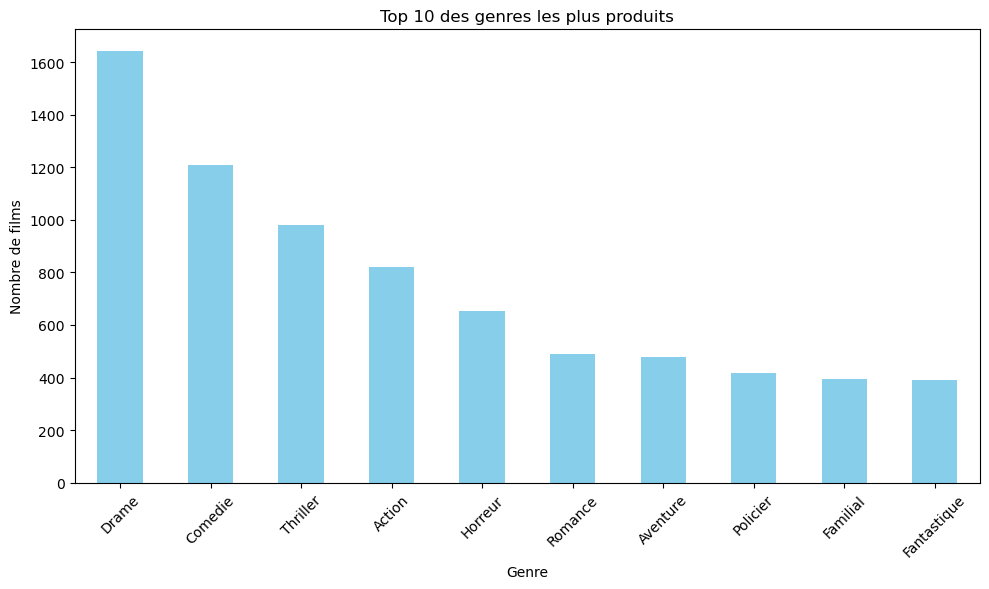

In [35]:
import matplotlib.pyplot as plt

genre_counts = df_exploded['Genre'].value_counts().head(10)

# Tracer un graphique à barres
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 des genres les plus produits')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Moyenne des revenus par genre</h2>

In [36]:

# Séparer les genres multiples (séparés par '|') en plusieurs lignes
df_exploded_r = df_exploded.assign(genre=df['Genre'].str.split('|')).explode('Genre')

# Calculer la moyenne des revenus (Column18) par genre
revenus_moyens = df_exploded_r.groupby('Genre')['Recettes'].mean().reset_index()

# Trier par revenu moyen décroissant
revenus_moyens = revenus_moyens.sort_values(by='Recettes', ascending=False)

print(revenus_moyens.head(10))

              Genre      Recettes
2          Aventure  1.029582e+08
22  science-fiction  6.981385e+07
0            Action  6.181903e+07
9          Histoire  5.765841e+07
7       Fantastique  5.513277e+07
1         Animation  5.508482e+07
6          Familial  5.261725e+07
14          Musique  5.002649e+07
8            Guerre  3.725098e+07
15          Mystere  2.689551e+07


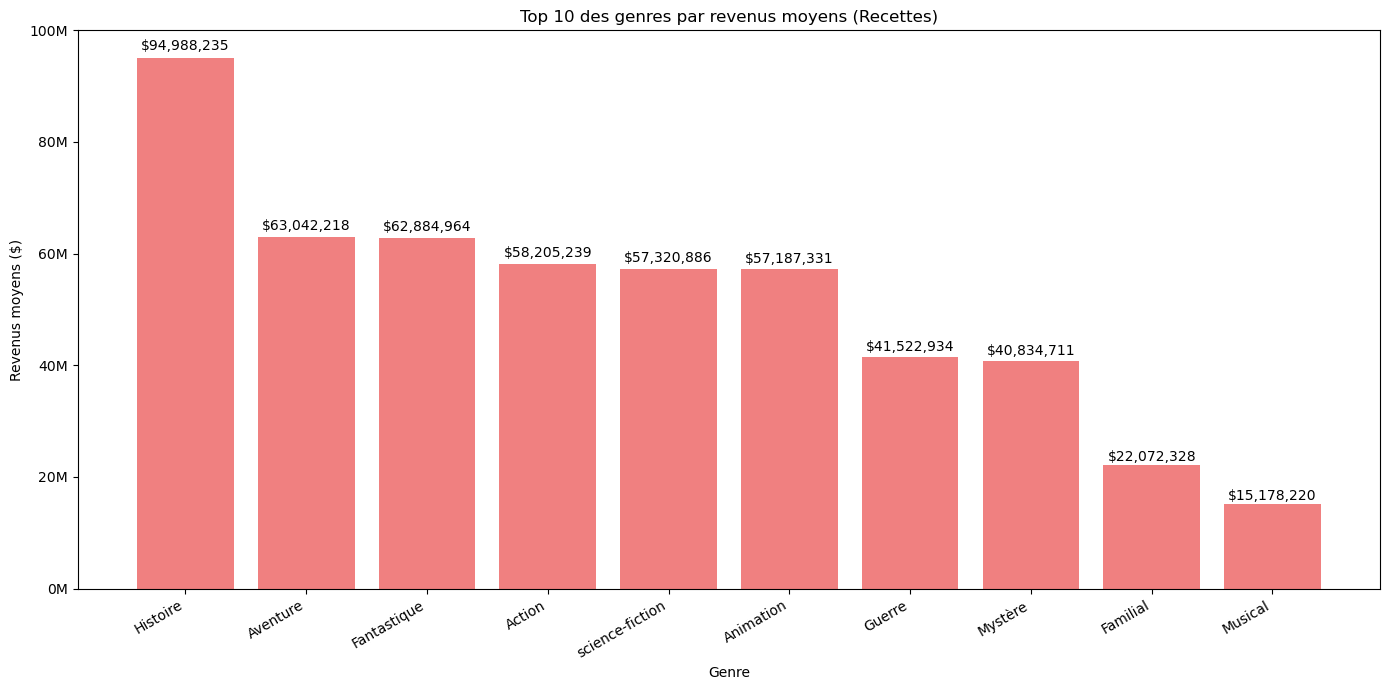

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# S'assurer que le genre est bien une chaîne
df['Genre'] = df['Genre'].astype(str)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Correction des noms de genres incohérents
df['Genre'] = df['Genre'].replace({
    'science fiction': 'science-fiction',
    'Science fiction': 'Science-fiction',
    'Sci fi': 'Science-fiction',
    # Ajoutez d'autres au besoin
})

# Enlever les éventuels crochets ou apostrophes
df['Genre'] = df['Genre'].str.replace(r"[\[\]']", '', regex=True)

# Calcul des revenus moyens
revenus_moyens = df.groupby('Genre')['Recettes'].mean().sort_values(ascending=False).head(10)

# Raccourcir les labels pour l'affichage
labels = [g if len(g) < 25 else g[:22] + "..." for g in revenus_moyens.index]

# Graphique
plt.figure(figsize=(14, 7))
bars = plt.bar(labels, revenus_moyens.values, color='lightcoral')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f"${int(yval):,}", ha='center', va='bottom')

plt.title('Top 10 des genres par revenus moyens (Recettes)')
plt.xlabel('Genre')
plt.ylabel('Revenus moyens ($)')
plt.xticks(rotation=30, ha='right')

# Axe Y dynamique
max_val = revenus_moyens.max()
step = int(np.ceil(max_val / 6 / 10_000_000)) * 10_000_000
yticks = np.arange(0, max_val + step, step)
ytick_labels = [f'{int(y/1e6)}M' for y in yticks]
plt.yticks(yticks, ytick_labels)

plt.tight_layout()
plt.show()



<h2> Revenus totals par Genre</h2>


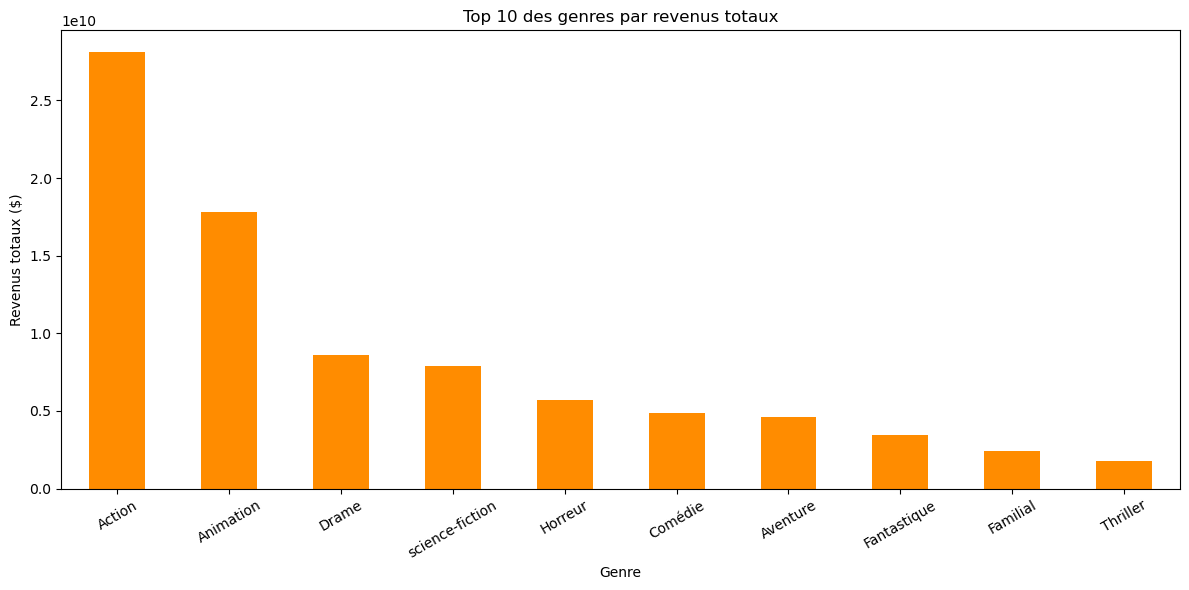

In [ ]:

revenus_totaux = df.groupby('Genre')['Recettes'].sum().sort_values(ascending=False).head(10)

revenus_totaux.plot(kind='bar', figsize=(12,6), color='darkorange')
plt.title('Top 10 des genres par revenus totaux')
plt.ylabel('Revenus totaux ($)')
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<h2>Note moyenne par genre + Nombre de films (quantité vs qualité)</h2>
Un genre peut être bien noté mais peu produit. "Combinaison qualité + volume".

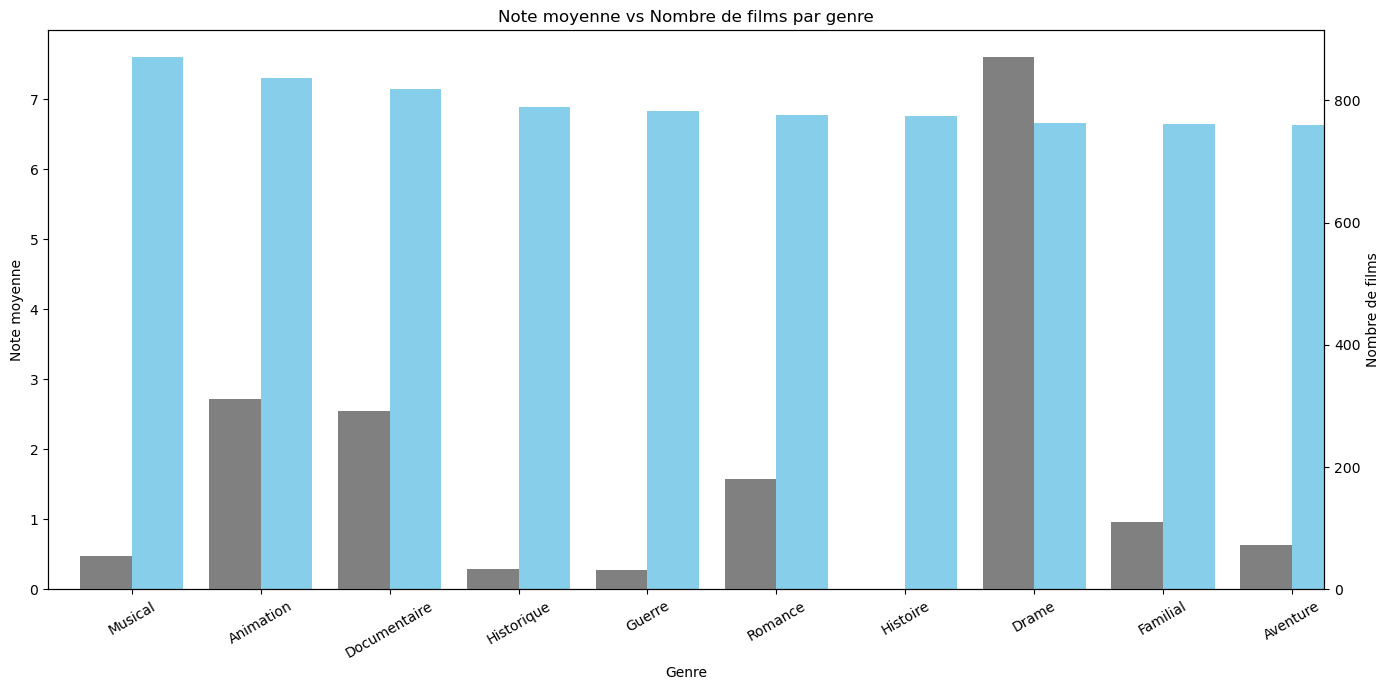

In [ ]:
notes_volume = df.groupby('Genre').agg({
    'Note_moyenne': 'mean',
    'Titre': 'count'
}).rename(columns={'Titre': 'Nombre de films'}).sort_values(by='Note_moyenne', ascending=False)

# Affichage combiné (2 axes)
fig, ax1 = plt.subplots(figsize=(14,7))

ax2 = ax1.twinx()
notes_volume['Note_moyenne'].head(10).plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
notes_volume['Nombre de films'].head(10).plot(kind='bar', ax=ax2, color='gray', position=1, width=0.4)

ax1.set_ylabel('Note moyenne')
ax2.set_ylabel('Nombre de films')
ax1.set_title('Note moyenne vs Nombre de films par genre')
ax1.set_xlabel('Genre')
ax1.set_xticklabels(notes_volume.index[:10], rotation=30)
plt.tight_layout()
plt.show()


<h2>Rentabilité par genre (Recettes – Budget)</h2>
Quelle est la marge ou le retour sur investissement moyen(RIO) ?</br>
ps: Un ROI de 1.0 = le film a remboursé son budget sans bénéfice.</br>
    Un ROI de > 2.0 = le film a généré le double de son coût.</br>
    Un ROI de < 1.0 = perte financière.</br>

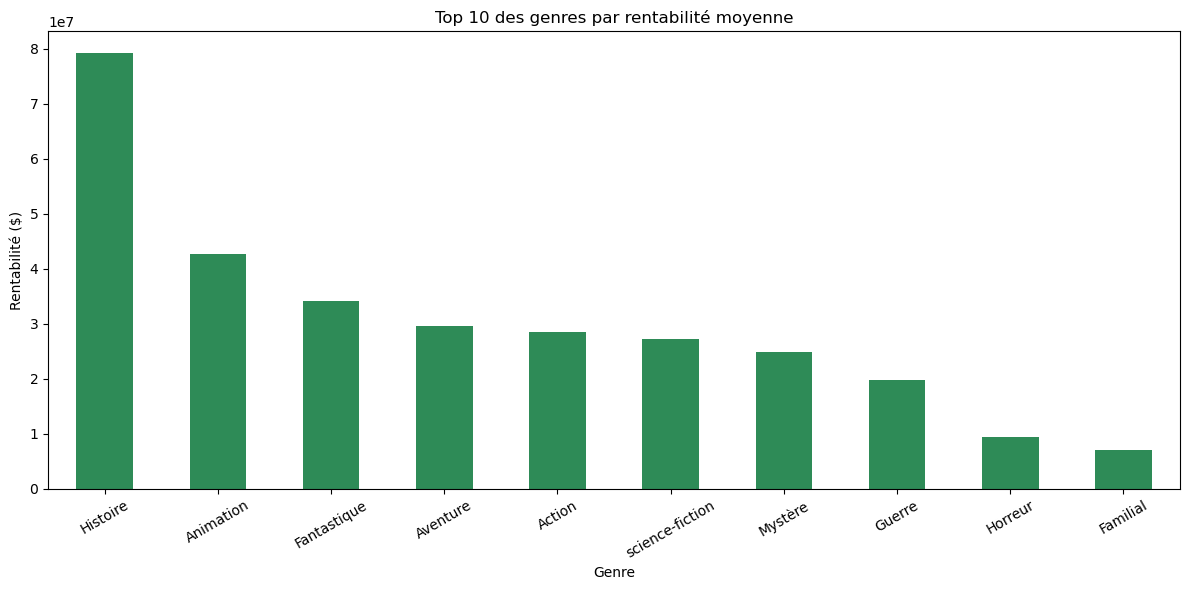

In [ ]:

df['Rentabilite'] = df['Recettes'] - df['Budget']
rentabilite_moyenne = df.groupby('Genre')['Rentabilite'].mean().sort_values(ascending=False).head(10)

rentabilite_moyenne.plot(kind='bar', figsize=(12,6), color='seagreen')
plt.title('Top 10 des genres par rentabilité moyenne')
plt.ylabel('Rentabilité ($)')
plt.xlabel('Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<h2>Taux d’échec par genre</h2>
% de films d’un genre qui n’ont pas dépassé leur budget

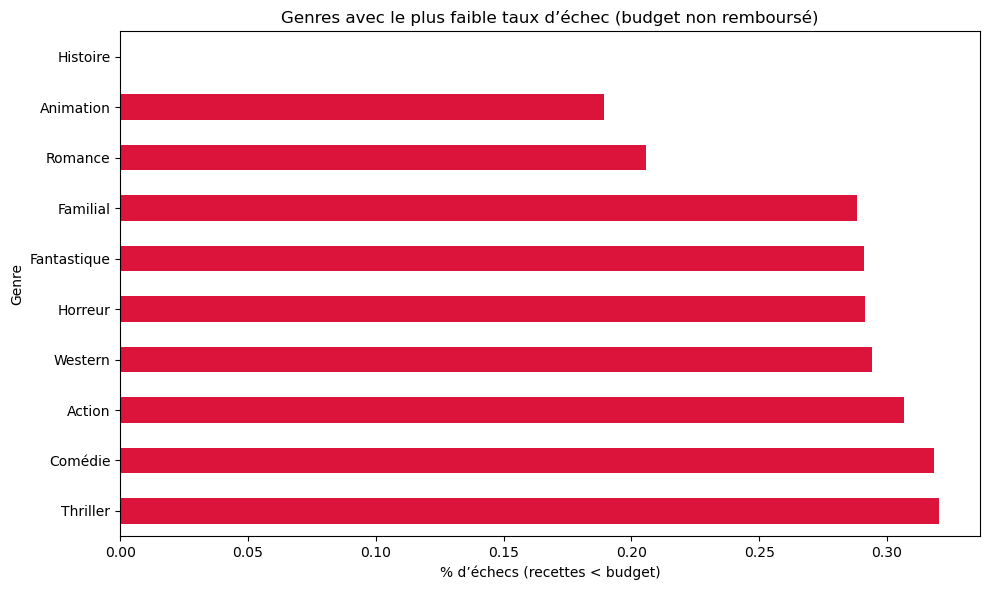

In [ ]:

df['Echec'] = df['Recettes'] < df['Budget']
taux_echec = df.groupby('Genre')['Echec'].mean().sort_values().head(10)

taux_echec.plot(kind='barh', figsize=(10,6), color='crimson')
plt.title('Genres avec le plus faible taux d’échec (budget non remboursé)')
plt.xlabel('% d’échecs (recettes < budget)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2>Revenus moyens par pays de production</h2>

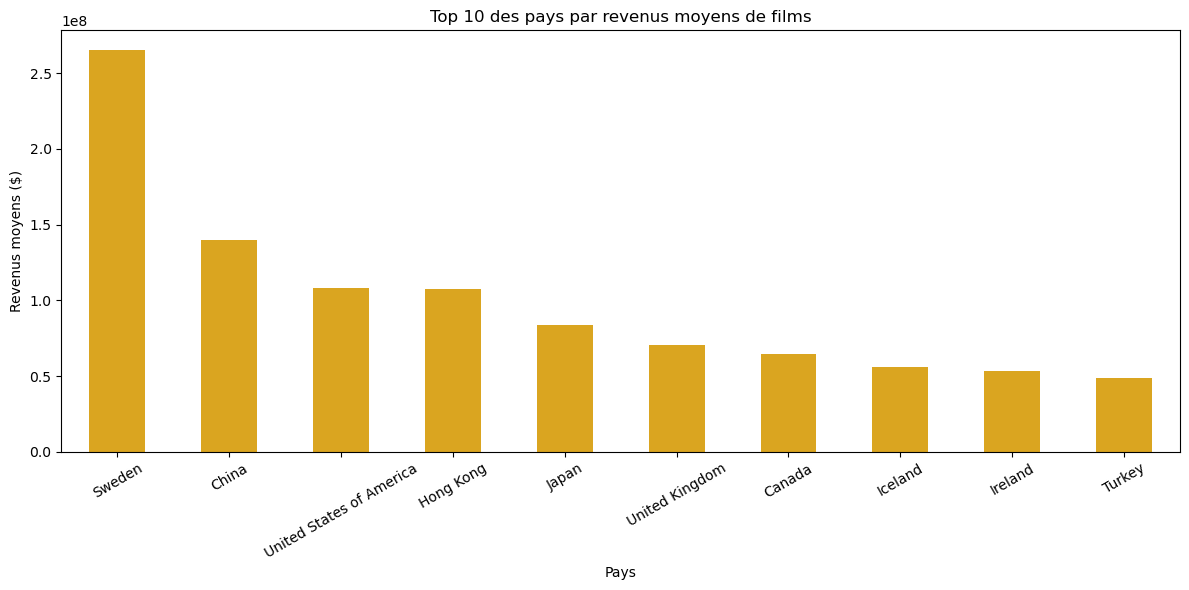

In [ ]:

import matplotlib.pyplot as plt

# Nettoyer la colonne Pays pour n’avoir qu’un seul pays par film
df['Pays_origine'] = df['Pays_origine'].astype(str)
df['Pays_origine'] = df['Pays_origine'].apply(lambda x: x.split(',')[0].strip())

# Revenus moyens par pays
revenus_pays = df.groupby('Pays_origine')['Recettes'].mean().sort_values(ascending=False).head(10)

revenus_pays.plot(kind='bar', figsize=(12,6), color='goldenrod')
plt.title('Top 10 des pays par revenus moyens de films')
plt.ylabel('Revenus moyens ($)')
plt.xlabel('Pays')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<h2>Rentabilité moyenne par pays</h2>

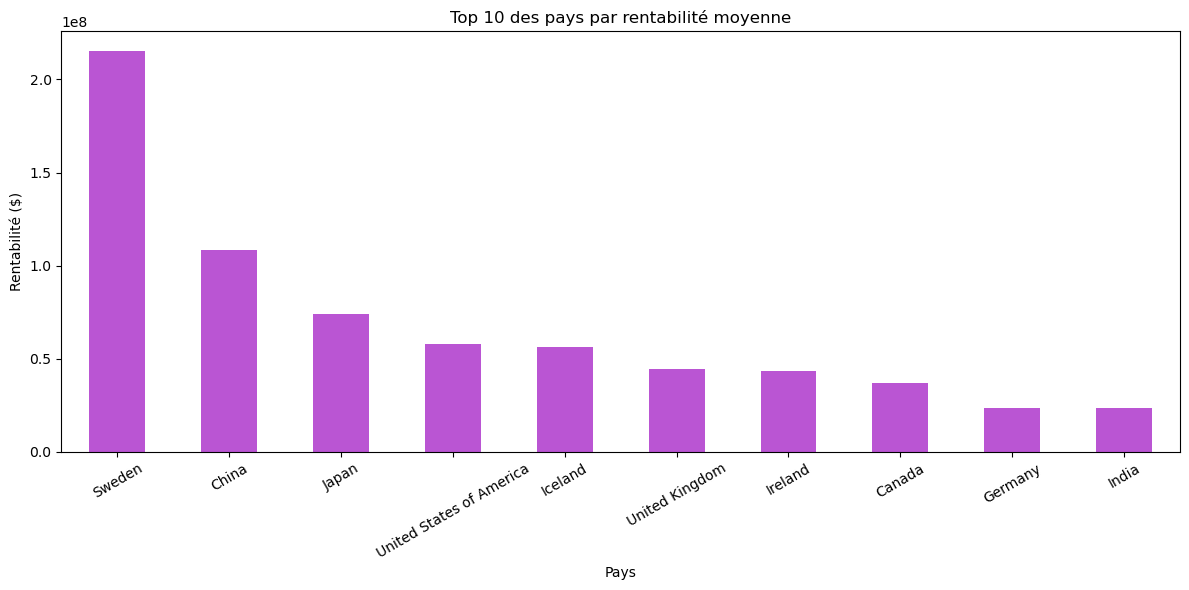

In [ ]:

df['Rentabilite'] = df['Recettes'] - df['Budget']
rentabilite_pays = df.groupby('Pays_origine')['Rentabilite'].mean().sort_values(ascending=False).head(10)

rentabilite_pays.plot(kind='bar', figsize=(12,6), color='mediumorchid')
plt.title('Top 10 des pays par rentabilité moyenne')
plt.ylabel('Rentabilité ($)')
plt.xlabel('Pays')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


<h2>Acteurs les plus rentables (moyenne des recettes des films où ils jouent)</h2>

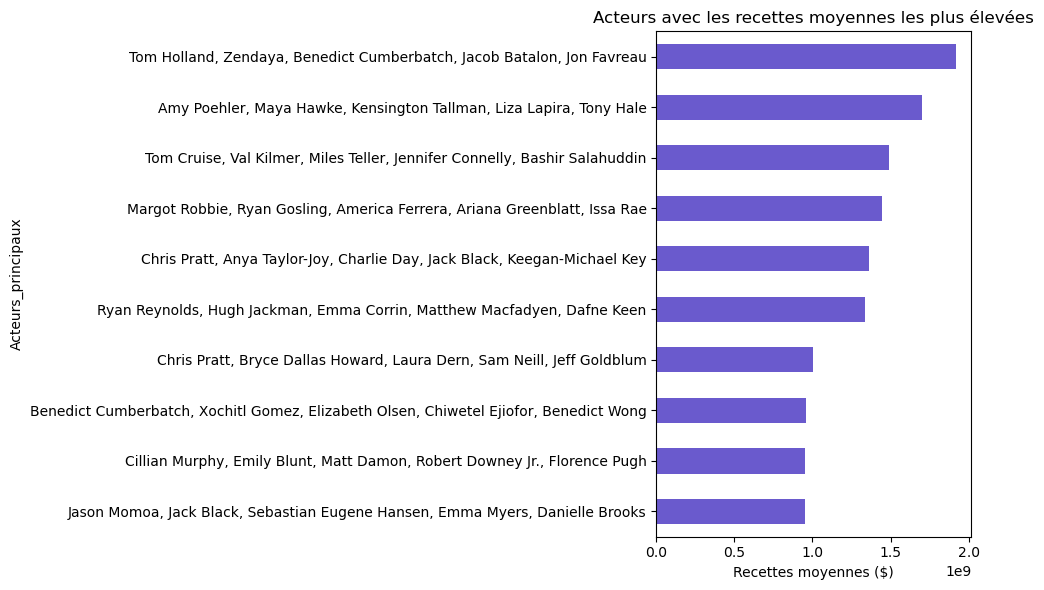

In [ ]:

import unicodedata

def est_ascii(s):
    try:
        s.encode('ascii')
        return True
    except:
        return False

# Exemple : nettoyage de noms d’acteurs non ASCII
df['Acteurs_principaux'] = df['Acteurs_principaux'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)

df['Acteurs_principaux'] = df['Acteurs_principaux'].astype(str)

# Si plusieurs acteurs dans la colonne → explosion
df_acteurs = df.assign(Acteurs=df['Acteurs_principaux'].str.split(',')).explode('Acteurs_principaux')
df_acteurs['Acteurs_principaux'] = df_acteurs['Acteurs_principaux'].str.strip()

# Calcul de la recette moyenne par acteur
revenus_acteurs = df_acteurs.groupby('Acteurs_principaux')['Recettes'].mean().sort_values(ascending=False).head(10)

revenus_acteurs.plot(kind='barh', figsize=(10,6), color='slateblue')
plt.title('Acteurs avec les recettes moyennes les plus élevées')
plt.xlabel('Recettes moyennes ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2>Acteurs les plus fréquents dans les films à succès</h2>

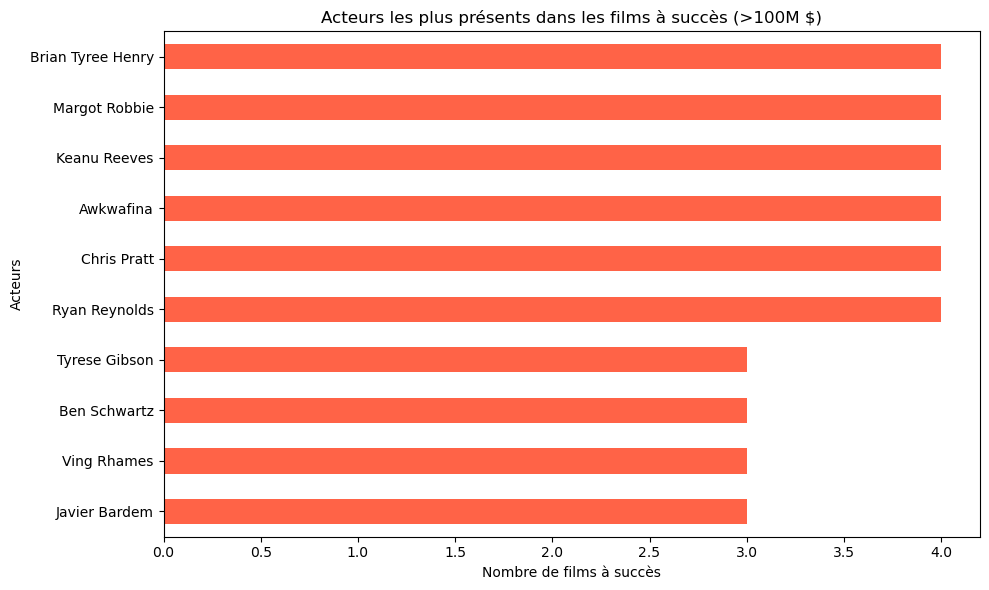

In [ ]:
seuil_succes = 100_000_000
df_succes = df[df['Recettes'] > seuil_succes].copy()

# Séparation des acteurs
df_succes = df_succes.assign(Acteurs=df_succes['Acteurs_principaux'].str.split(',')).explode('Acteurs')

# Nettoyage
df_succes['Acteurs'] = df_succes['Acteurs'].str.strip()
df_succes = df_succes[
    df_succes['Acteurs'].notna() & 
    (df_succes['Acteurs'] != '') & 
    (df_succes['Acteurs'] != '[Nom non valide]')
]

# Comptage
acteurs_succes = df_succes['Acteurs'].value_counts().head(10)

# Affichage
acteurs_succes.plot(kind='barh', figsize=(10,6), color='tomato')
plt.title('Acteurs les plus présents dans les films à succès (>100M $)')
plt.xlabel('Nombre de films à succès')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2>Réalisateurs les plus rentables </h2>

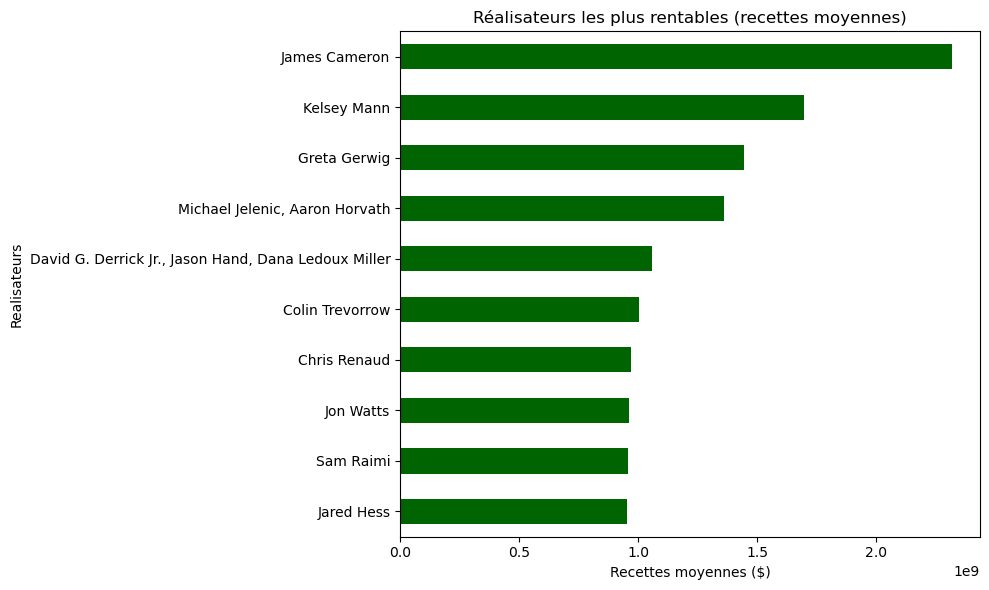

In [ ]:


import unicodedata

def est_ascii(s):
    try:
        s.encode('ascii')
        return True
    except:
        return False

# Exemple : nettoyage de noms d’acteurs non ASCII
df['Acteurs_principaux'] = df['Acteurs_principaux'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)
# Nettoyage aussi des noms de réalisateurs
df['Realisateurs'] = df['Realisateurs'].apply(
    lambda x: x if est_ascii(x) else '[Nom non valide]'
)

revenus_real = df.groupby('Realisateurs')['Recettes'].mean().sort_values(ascending=False).head(10)

revenus_real.plot(kind='barh', figsize=(10,6), color='darkgreen')
plt.title('Réalisateurs les plus rentables (recettes moyennes)')
plt.xlabel('Recettes moyennes ($)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2>Conclusion</h2>
D’après notre analyse sur X milliers de films, les genres qui génèrent les meilleures recettes moyennes et une rentabilité élevée, sont l'Histoire avec 94,988,235$ de revenus moyen et un RIO (la marge ou le retour sur investissement moyen) > 7 et l’animation avec 57,320,886$ de revenus moyen et un RIO > 4, 
notamment quand ils sont produits en europe, en asie ou au États-Unis , et avec des réalisateurs comme James cameron, kesey Mann, Greta Gerwing et des acteurs stars comme Brian Thyree Henry, Margot Robbie, Keanu Reeves, Awkawafina, Chris Pratt ou Ryan Renynolds. </br>
Le taux d’échec pour ces genres est aussi parmi les plus bas.